# HR Analytics: Job Change of Data Scientists

### Data Science project from Kaggle: 
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

#### 
### Task description


A Company wants to know which of its candidates of data scientists are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.


This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials, demographics, experience data we will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.


### Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change
#### 

### Load dataset

In [1]:
# import libraries for exploratory data analysis
import pandas as pd # data analysis
import numpy as np # linear algebra

# import libraries to visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
data = pd.read_csv('dataset/aug_train.csv')

### Data Overview

In [3]:
# check the dataset
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data.shape

(19158, 14)

In [5]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
# feature ID is not useful for the model,we drop it
data.drop('enrollee_id',axis=1,inplace=True)

#### 
### Exploratory Data Analysis

In [8]:
data.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [9]:
# check the data type of each columns
# and make list of variables types

# numerical
numerical = [var for var in data.columns if data[var].dtype!='O']

# categorical
categorical = [var for var in data.columns if data[var].dtype == 'O']

print('There are {} numerical variables'.format(len(numerical)))
print('There are {} categorical variables'.format(len(categorical)))

There are 3 numerical variables
There are 10 categorical variables


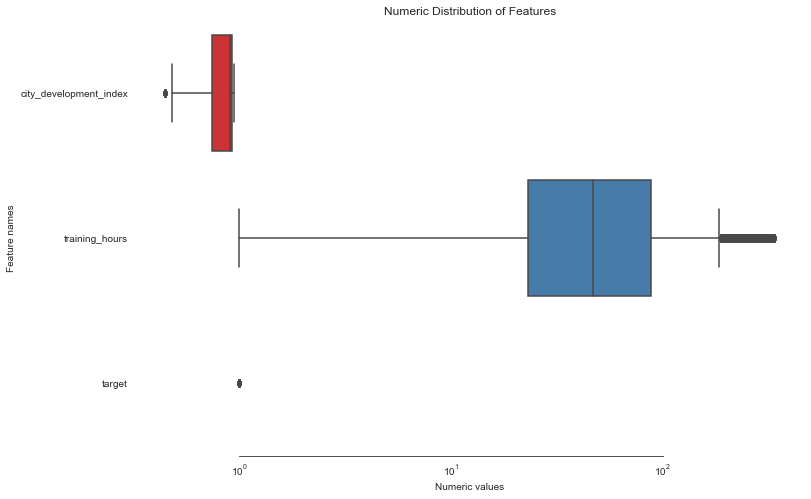

In [10]:
# plot all numeric values
sns.set_style("white")
f, ax = plt.subplots(figsize=(12, 8))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numerical] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

<AxesSubplot:xlabel='gender', ylabel='target'>

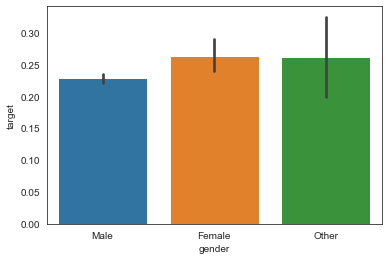

In [11]:
# show the relationship between gender and the job change
plt.figure(figsize=(6,4))
sns.barplot(x='gender',y='target',data=data)

<AxesSubplot:xlabel='company_type', ylabel='target'>

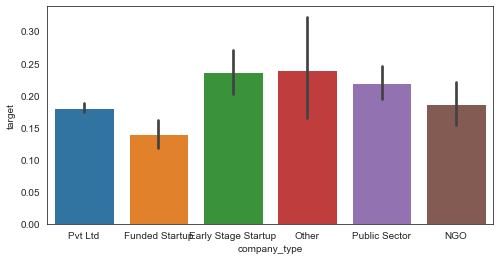

In [12]:
# check employer in which type of commpany tends to change the job
plt.figure(figsize=(8,4))
sns.barplot(x='company_type',y='target',data=data)

<AxesSubplot:xlabel='education_level', ylabel='training_hours'>

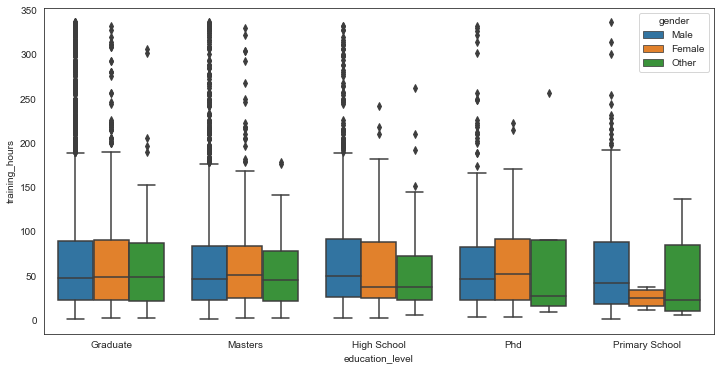

In [13]:
# check the relationship between education level and training hours
plt.figure(figsize=(12,6))
sns.boxplot(x="education_level", y="training_hours", hue="gender",data=data)

<AxesSubplot:xlabel='major_discipline', ylabel='city_development_index'>

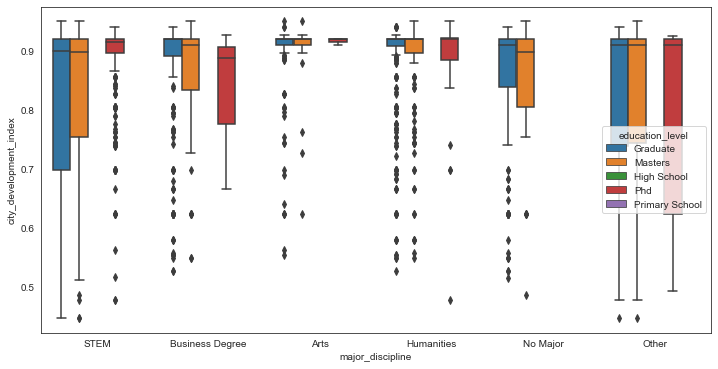

In [14]:
# check the relationship between city development index and training hours
plt.figure(figsize=(12,6))
sns.boxplot(x="major_discipline", y="city_development_index", hue="education_level",data=data)

#### 
### Seperate dataset into train and test data

In [15]:
# split these datasets into normal train data and test data
from sklearn.model_selection import train_test_split

X = data.drop(labels='target',axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_train.shape, X_test.shape

((15326, 12), (3832, 12))

#### 
### Feature engineering

In [16]:
# check some basic information
def unqiue_element(x):
    a = len(np.unique(x))
    return a

df_eda = pd.DataFrame(
    [X_train.dtypes, X_train.astype(str).apply(unqiue_element), 
    X_train.isnull().sum()/X_train.shape[0]]
    ).T

df_eda.columns = ['Data Type', 'Unique Value', 'Percentage of NA']
df_eda

,Data Type,Unique Value,Percentage of NA
city,object,123,0
city_development_index,float64,93,0
gender,object,4,0.234503
relevent_experience,object,2,0
enrolled_university,object,4,0.0197703
education_level,object,6,0.0242072
major_discipline,object,7,0.146092
experience,object,23,0.00345818
company_size,object,9,0.310388
company_type,object,7,0.32024


<AxesSubplot:>

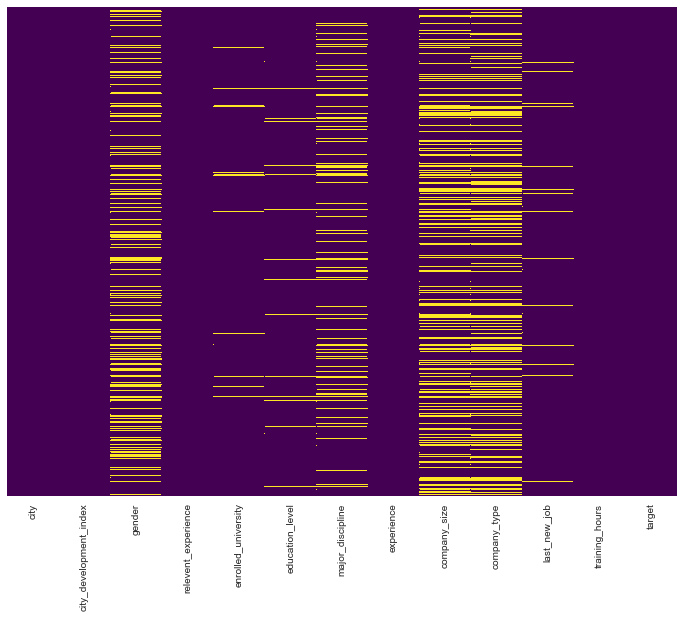

In [17]:
# plot the missing value using heatmap
plt.figure(figsize=(12,9))

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# check all unique values of each feature
for i in data.columns:
    print(i, data[i].unique(),'\n')

city ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city


For features with no more than 5% missing value, we use frequent category imputation.

For those features with a big number of missing value, we should not ignore this information.

In [19]:
# impute the missing data less than 5 percent
from feature_engine.imputation import CategoricalImputer

imputer = CategoricalImputer(
    imputation_method='frequent',
    variables=['education_level','last_new_job','enrolled_university','experience']
)

imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['education_level', 'last_new_job',
                              'enrolled_university', 'experience'])

In [20]:
# the values that will be used to replace NA for each variable
imputer.imputer_dict_

{'education_level': 'Graduate',
 'last_new_job': '1',
 'enrolled_university': 'no_enrollment',
 'experience': '>20'}

In [21]:
# transform the train and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [22]:
# check features again,there is no missing value in these two columns now
X_train.isnull().sum().sort_values()

city                         0
city_development_index       0
relevent_experience          0
enrolled_university          0
education_level              0
experience                   0
last_new_job                 0
training_hours               0
major_discipline          2239
gender                    3594
company_size              4757
company_type              4908
dtype: int64

In [23]:
# encode features with big number of missing values
from feature_engine.imputation import AddMissingIndicator

imputer_add = AddMissingIndicator(missing_only=True)
imputer_add.fit(X_train)

AddMissingIndicator()

In [24]:
# show the features with missing values
imputer_add.variables_

['gender', 'major_discipline', 'company_size', 'company_type']

In [25]:
# transform the datasets
X_train = imputer_add.transform(X_train)
X_test = imputer_add.transform(X_test)

In [26]:
# impute the missing value with frequent categories
imputer_cat = CategoricalImputer(
    imputation_method='frequent',
    variables=['major_discipline','gender','company_size','company_type']
)

imputer_cat.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['major_discipline', 'gender', 'company_size',
                              'company_type'])

In [27]:
imputer_cat.imputer_dict_

{'major_discipline': 'STEM',
 'gender': 'Male',
 'company_size': '50-99',
 'company_type': 'Pvt Ltd'}

In [28]:
# transform the datasets
X_train = imputer_cat.transform(X_train)
X_test = imputer_cat.transform(X_test)

In [29]:
# check the missing data again
X_train.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
gender_na                 0
major_discipline_na       0
company_size_na           0
company_type_na           0
dtype: int64

#### 
### Categorical encoding

In [30]:
# In this section we handle object data
categorical

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [31]:
X_train[categorical].nunique()

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64

In [32]:
# check the feature city with high cardinality
X_train['city'].unique()

array(['city_103', 'city_160', 'city_11', 'city_21', 'city_173',
       'city_16', 'city_114', 'city_1', 'city_75', 'city_64', 'city_67',
       'city_69', 'city_91', 'city_13', 'city_50', 'city_136', 'city_19',
       'city_128', 'city_20', 'city_89', 'city_100', 'city_157',
       'city_65', 'city_104', 'city_98', 'city_97', 'city_159',
       'city_138', 'city_61', 'city_71', 'city_41', 'city_105', 'city_33',
       'city_102', 'city_117', 'city_123', 'city_27', 'city_73',
       'city_40', 'city_28', 'city_152', 'city_36', 'city_134', 'city_83',
       'city_55', 'city_84', 'city_77', 'city_57', 'city_142', 'city_150',
       'city_70', 'city_74', 'city_44', 'city_101', 'city_116', 'city_90',
       'city_10', 'city_23', 'city_99', 'city_165', 'city_46', 'city_126',
       'city_45', 'city_9', 'city_30', 'city_158', 'city_176', 'city_62',
       'city_127', 'city_14', 'city_162', 'city_72', 'city_76', 'city_7',
       'city_149', 'city_118', 'city_141', 'city_24', 'city_144',
     

In [33]:
# reduce the cardinality in city features
def rare_encoding(X_train, X_test, var, tolerance):

    # find the most frequent category
    temp = X_train.groupby([var])[var].count() / len(X_train)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    # re-group rare labels
    X_train[var] = np.where(X_train[var].isin(
    non_rare), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
    non_rare), X_test[var], 'Rare')

    return X_train,X_test

In [34]:
rare_encoding(X_train,X_test,'city',0.05)

(           city  city_development_index  gender      relevent_experience  \
 12737  city_103                   0.920    Male  Has relevent experience   
 196        Rare                   0.920    Male  Has relevent experience   
 12669      Rare                   0.550  Female  Has relevent experience   
 9890    city_21                   0.624    Male  Has relevent experience   
 1759    city_21                   0.624    Male  Has relevent experience   
 ...         ...                     ...     ...                      ...   
 5695       Rare                   0.924    Male  Has relevent experience   
 8006    city_16                   0.910    Male  Has relevent experience   
 17745      Rare                   0.920    Male  Has relevent experience   
 17931   city_21                   0.624    Male  Has relevent experience   
 13151  city_114                   0.926    Male   No relevent experience   
 
       enrolled_university education_level major_discipline experience  \


In [35]:
# encode the features city into numerical variables
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',
                             variables='city')

In [36]:
# fit and transform each column
ordinal_enc.fit(X_train)

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [37]:
X_train['city'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [38]:
# show the feature experience
X_train['experience'].value_counts()

>20    2638
5      1163
4      1133
3      1072
6       978
2       904
7       833
10      790
9       784
8       654
15      553
11      541
14      461
1       439
<1      420
16      411
12      393
13      313
17      277
19      235
18      214
20      120
Name: experience, dtype: int64

<AxesSubplot:xlabel='experience', ylabel='Count'>

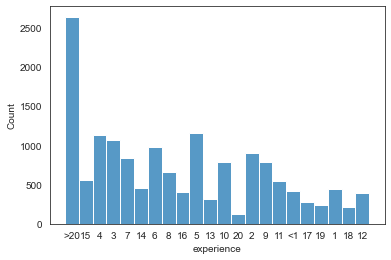

In [39]:
sns.histplot(X_train['experience'])

In [40]:
# reduce the categories in this feature
def cat_reduce(data,col):
    data[col].replace(['>20','20'],20,inplace=True)
    data[col].replace(['19','18','17','16','15'],15,inplace=True)
    data[col].replace(['14','13','12','11','10'],10,inplace=True)
    data[col].replace(['5','6','7','8','9'],5,inplace=True)         
    data[col].replace(['2','3','4'],2,inplace=True) 
    data[col].replace(['<1','1'],0,inplace=True)

In [41]:
cat_reduce(X_train,'experience')
cat_reduce(X_test,'experience')

In [42]:
X_train['experience'].value_counts()

5     4412
2     3109
20    2758
10    2498
15    1690
0      859
Name: experience, dtype: int64

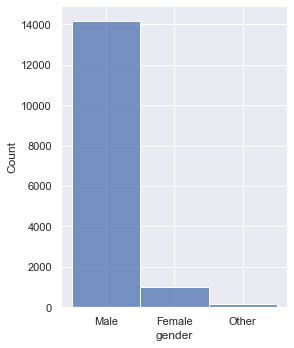

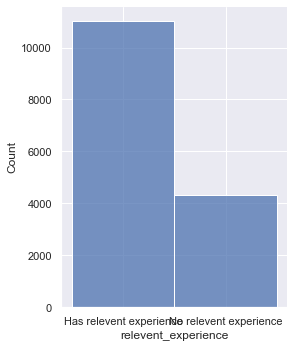

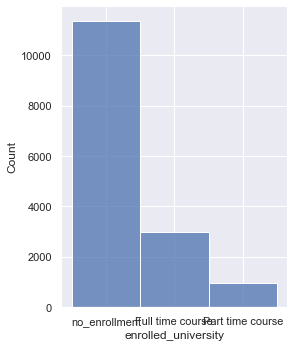

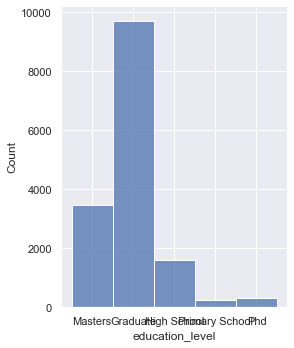

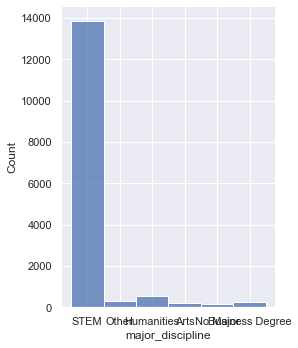

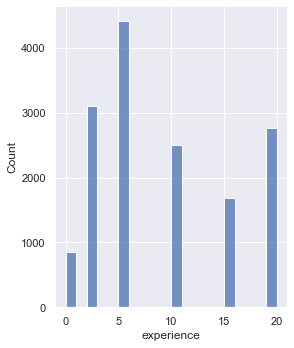

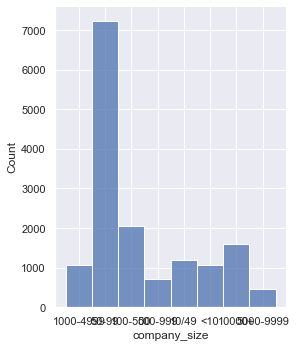

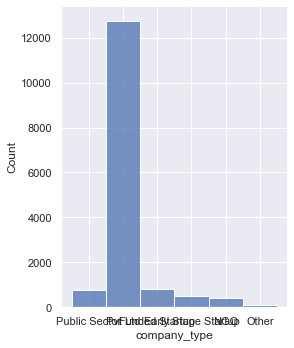

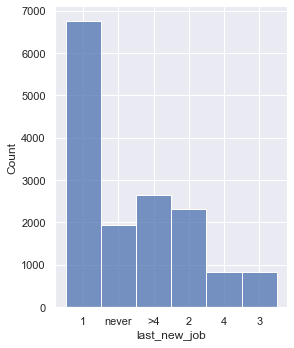

In [43]:
categorical.remove('city')
sns.set(style="darkgrid")
for col in categorical:
    sns.displot(x=X_train[col],aspect=0.85)

In [44]:
# first we transform feature relevent_experience into binary variables
X_train.replace({'Has relevent experience':1, 'No relevent experience':0},inplace=True)
X_test.replace({'Has relevent experience':1, 'No relevent experience':0},inplace=True)

In [45]:
# encode feature last_new_job, we need numerical variables
X_train['last_new_job'].replace('never','0',inplace=True)
X_train['last_new_job'].replace('>4','5',inplace=True)

X_test['last_new_job'].replace('never','0',inplace=True)
X_test['last_new_job'].replace('>4','5',inplace=True)

X_train['last_new_job'] = X_train['last_new_job'].apply(pd.to_numeric)
X_test['last_new_job'] = X_test['last_new_job'].apply(pd.to_numeric)

In [46]:
X_train['company_size'].value_counts()

50-99        7228
100-500      2041
10000+       1587
10/49        1183
1000-4999    1062
<10          1062
500-999       710
5000-9999     453
Name: company_size, dtype: int64

In [47]:
# encode feature company_size into four categories and reduce the cardinality
def size_reduce(dataset,col):
    dataset[col].replace(['10000+','5000-9999'],5000,inplace=True)
    dataset[col].replace(['1000-4999','500-999'],500,inplace=True)
    dataset[col].replace(['100-500','50-99'],50,inplace=True)
    dataset[col].replace(['10/49','<10'],5,inplace=True)

In [48]:
size_reduce(X_train,'company_size')
size_reduce(X_test,'company_size')

In [49]:
# for categorical variables we use integer encoder
from feature_engine.encoding import OrdinalEncoder
feature = ['gender','enrolled_university','education_level','major_discipline','company_type']

int_enc = OrdinalEncoder(encoding_method='arbitrary',variables=feature)
int_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['gender', 'enrolled_university', 'education_level',
                          'major_discipline', 'company_type'])

In [50]:
X_train = int_enc.transform(X_train)
X_test = int_enc.transform(X_test)

In [51]:
int_enc.variables

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type']

#### 
### Outlier Engineering

In [52]:
# show all int and float values
X_train.select_dtypes(['int','float']).columns

Index(['city_development_index', 'gender_na', 'major_discipline_na',
       'company_size_na', 'company_type_na'],
      dtype='object')

<AxesSubplot:xlabel='city_development_index'>

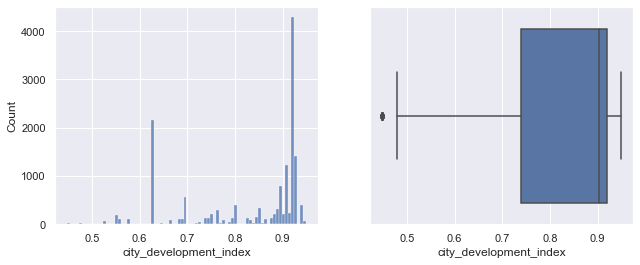

In [53]:
# show the distribution of each continuous features
plt.figure(figsize=(16, 4))    

plt.subplot(1, 3, 1)
sns.histplot(x='city_development_index',data=X_train,bins=80)

plt.subplot(1, 3, 2)    
sns.boxplot(x='city_development_index',data=X_train)

In [54]:
# import library to handle the outliers
from feature_engine.outliers import ArbitraryOutlierCapper

capper = ArbitraryOutlierCapper(max_capping_dict=None,min_capping_dict={'city_development_index':0.5})
capper.fit(X_train)

ArbitraryOutlierCapper(min_capping_dict={'city_development_index': 0.5})

In [55]:
X_train = capper.transform(X_train)
X_test = capper.transform(X_test)

#### 
### Feature Selection with feature engine

In [56]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features)

[]


In [57]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [58]:
# print the number of quasi-constant features
quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant)

0

In [59]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10


0

In [60]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

correlated features:  0


((15326, 16), (3832, 16))

In [61]:
# use Wrapper model to select features
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(model, 8) 
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_) 

E:\Informatik\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True  True False False False  True False  True  True False  True  True
 False False  True False]
[1 1 9 7 2 1 5 1 1 4 1 1 6 8 1 3]


In [62]:
# check these selected features
col_filter = X_train.columns[rfe.support_]
col_filter

Index(['city', 'city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'company_size_na'],
      dtype='object')

In [63]:
X_train = X_train[col_filter]
X_test = X_test[col_filter]

#### 
### Data preprocessing

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 
### Model building

In [65]:
# import machine learning algorithm model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [66]:
# train the model
KNN = KNeighborsClassifier(n_neighbors=7)
rfc = RandomForestClassifier(n_estimators=200)
LR = LogisticRegression()
dtree = DecisionTreeClassifier()
svm = SVC(C=10,gamma=0.01)
data_dmatrix = xgb.DMatrix(X_train, y_train)
xg = xgb.XGBClassifier()

In [67]:
model_list = [rfc,LR,dtree,svm,KNN,xg]

In [68]:
# evaluate the algorithm we just build
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

for model in model_list:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(model)
    print(confusion_matrix(y_test,pred),'\n')
    print(classification_report(y_test,pred))
    print(roc_auc_score(y_test,pred),'\n')

RandomForestClassifier(n_estimators=200)
[[2515  353]
 [ 551  413]] 

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      2868
         1.0       0.54      0.43      0.48       964

    accuracy                           0.76      3832
   macro avg       0.68      0.65      0.66      3832
weighted avg       0.75      0.76      0.75      3832

0.6526704746031471 

LogisticRegression()
[[2685  183]
 [ 729  235]] 

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.85      2868
         1.0       0.56      0.24      0.34       964

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.60      3832
weighted avg       0.73      0.76      0.73      3832

0.5899842011146027 

DecisionTreeClassifier()
[[2279  589]
 [ 557  407]] 

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      2868
         1.0       0.

E:\Informatik\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[[2517  351]
 [ 506  458]] 

              precision    recall  f1-score   support

         0.0       0.83 